# CodeAlong: From Distributions to Hypotheses

## Learning Objectives

- To be able to use probability density functions to calculate probability of specific values.

- To identify normally distributed features.
- To perform a hypothesis test to compare numeric data between 2 groups.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context('talk')
mpl.rcParams['figure.figsize'] = [12,6]

## Exploring Distributions 

Dataset: https://archive.ics.uci.edu/ml/datasets/student+performance

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
## read in the Data/student/student-mat.csv (it uses ";" as the sep)
df = pd.read_csv('Data/student/student-mat.csv',sep =';')
# display info and .head
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
## Calculate an Avg Grade column by averaging G1, G2,G3, 
# then divide by 20, and * 100 (to make %'s')
df['avg grade'] = df[['G1','G2','G3']].mean(axis=1)/20*100

In [5]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,28.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,26.666667
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,41.666667
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,73.333333
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,43.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,45.000000
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,76.666667
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,41.666667
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,55.000000


<AxesSubplot:xlabel='avg grade', ylabel='Count'>

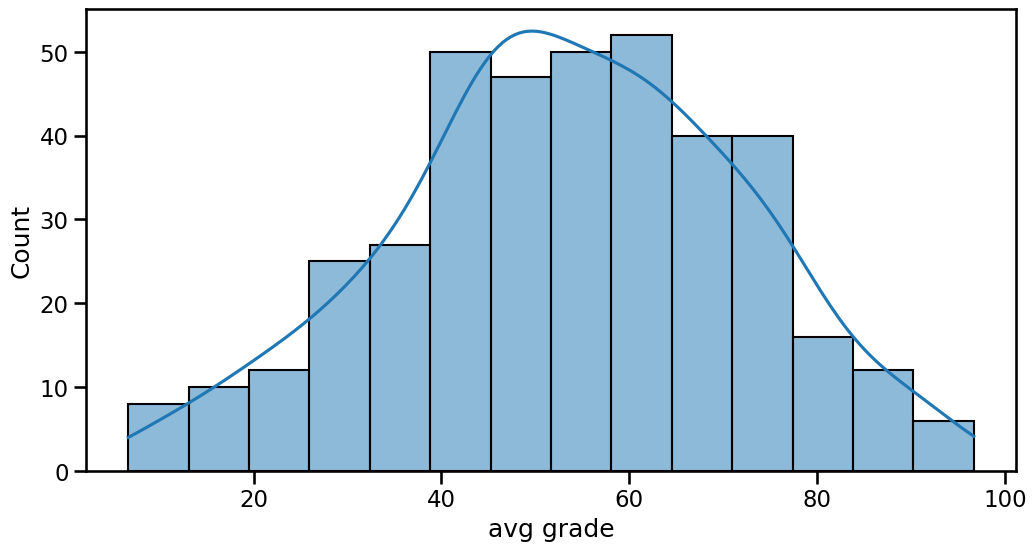

In [6]:
## plot the distribution of Avg Grade 
sns.histplot(data=df, x= 'avg grade', kde= True)

> Is it normally distributed?

In [7]:
## use scipy's normaltest
stats.normaltest(df['avg grade'])

NormaltestResult(statistic=3.692867619196469, pvalue=0.15779890502520094)

- We have our p-value for our normaltest, but what does it mean??
    - Check the docstring for the normaltest to find out the null hypothesis of the test.

In [8]:
# fail to reject null^^^^

### Calculating Probabilities with Scipy's  Probability Density Functions

In [9]:
## Get the mean, std, min, and max for the Avg Grade column

dist_stats = df['avg grade'].agg(['mean', 'std', 'min', 'max'])
dist_stats

mean    53.396624
std     18.483928
min      6.666667
max     96.666667
Name: avg grade, dtype: float64

In [10]:
## generate a linearly-spaced array of values that span the min to the max
xs = np.linspace(dist_stats.loc['min'], dist_stats.loc['max'])
xs

array([ 6.66666667,  8.50340136, 10.34013605, 12.17687075, 14.01360544,
       15.85034014, 17.68707483, 19.52380952, 21.36054422, 23.19727891,
       25.03401361, 26.8707483 , 28.70748299, 30.54421769, 32.38095238,
       34.21768707, 36.05442177, 37.89115646, 39.72789116, 41.56462585,
       43.40136054, 45.23809524, 47.07482993, 48.91156463, 50.74829932,
       52.58503401, 54.42176871, 56.2585034 , 58.0952381 , 59.93197279,
       61.76870748, 63.60544218, 65.44217687, 67.27891156, 69.11564626,
       70.95238095, 72.78911565, 74.62585034, 76.46258503, 78.29931973,
       80.13605442, 81.97278912, 83.80952381, 85.6462585 , 87.4829932 ,
       89.31972789, 91.15646259, 92.99319728, 94.82993197, 96.66666667])

In [11]:
## use stats.norm.pdf to get the PDF curve that corresponds to your distribution's values
pdf = stats.norm.pdf(xs, loc=dist_stats.loc['mean'], scale=dist_stats.loc['std'])
pdf

array([0.00088353, 0.00113026, 0.0014317 , 0.0017957 , 0.00223011,
       0.00274241, 0.00333926, 0.00402605, 0.0048064 , 0.00568162,
       0.00665023, 0.00770748, 0.00884504, 0.01005075, 0.01130861,
       0.01259887, 0.01389843, 0.01518139, 0.01641984, 0.01758482,
       0.01864741, 0.01957992, 0.02035706, 0.02095708, 0.0213628 ,
       0.0215624 , 0.02155003, 0.02132604, 0.02089702, 0.02027542,
       0.01947903, 0.01853004, 0.01745408, 0.01627906, 0.01503396,
       0.01374767, 0.01244791, 0.01116029, 0.00990755, 0.00870901,
       0.00758023, 0.00653293, 0.00557501, 0.0047108 , 0.00394144,
       0.00326533, 0.00267862, 0.00217574, 0.00174991, 0.00139359])

AttributeError: 'numpy.ndarray' object has no attribute 'xs'

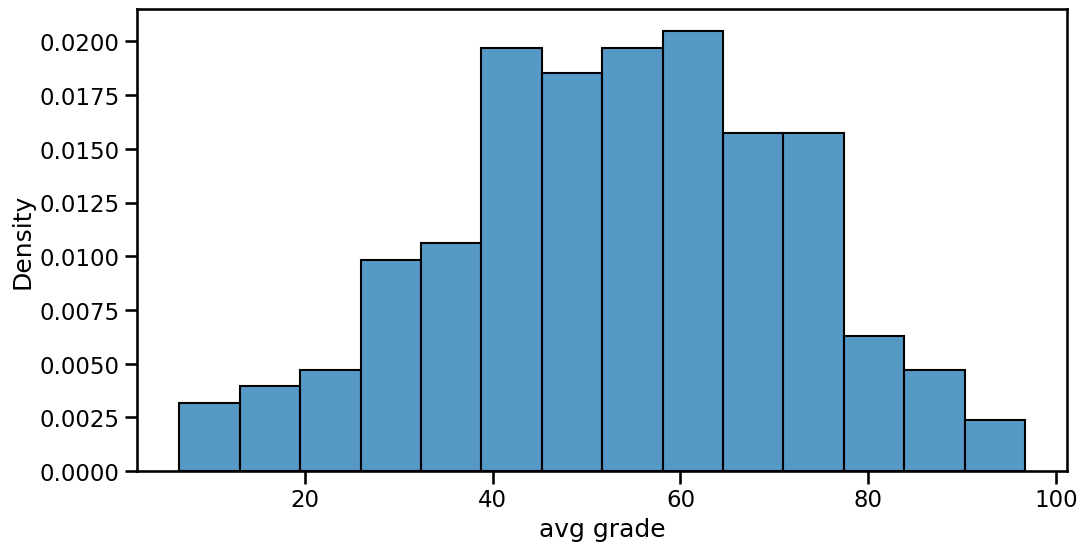

In [17]:
## Plot the histogram again AND then plot the pdf we calculated.
sns.histplot(data=df, x='avg grade', stat='density')
plt.plot(pdf.xs, color='red', label='PDF')

> Looks pretty normal! But can we confirm for a fact that its normal?

### Q1: what is the probability of a student getting a score of 90 or above?

In [ ]:
## Plot the histogram again AND pdf again
sns.histplot(data=df, x='avg grade', stat='density')
plt.plot(xs.pdf.color='red', label='PDF')

## Add a vpsan to the plot showing the region we want to calc prob for
plt.axvspan(90,100,alpha=0.6,color='orange',zorder=0)


> How can we calculate this probability? Can we use the PDF?

In [ ]:
## try making a list of values from 90-100 and getting the pdf values
above_90 = range(90,101)
above_90_pdf = stats.norm.pdf(above_90, loc=dist_stats.loc['mean'], scale=dist_stats.loc['std'])
## Sum the values to get the total probability. 
above_90_pdf.sum()

> Whats the flaw to this approach?

> Now, we want the opposite probability, probability of being GREATER Than 90.


In [ ]:
# calc 1-prob of 90 or lower.


- Answer: there is a 2.4% chance of having a score greater than 90.

# Hypothesis Testing

## Q: Do students with internet access have different average grades than students who do not have internet access?

### State The Hypothesis 

- $H_0$ (Null Hypothesis): Students with internet access have the same average grades as students who do not. 
- $H_A$ (Alternative Hypothesis): Students with internet access have significantly different average grades compared to students who do not. 

### Visualize and Separate Groups

- Visualize the histogram of Avg Grade again, but separate it into groups based on the "internet" column.
- Note: when comparing 2 groups with seaborn's histplot, you will want to add `common_norm=False`

In [ ]:
## visualize the histobram of Avg Grade again, but separate it by "internet"
sns.histplot(data=df, x='avg grade', hue='internet',common_norm=False, 
             stat='density',kde=True)

In [ ]:
## Plot a bar plot of the Avg Grade for students with internet vs those that do not have it
sns.barplot(data=df, y='avg grade', x='internet',)

In [ ]:
## Separate the 2 groups into 2 varaibles
grp_yes = df.loc[ df['internet']=='yes','avg grade']
grp_yes
grp_no = df.loc[ df['internet']!='yes','avg grade']
grp_no

### T-Test Assumptions

- Since we are comparing a numeric measurement between 2 groups, we want to run a 2-sample (AKA independent T-test).

- The Assumptions are:
    - No significant outliers
    - Normality 
    - Equal Variance 

#### Assumption: No Sig. Outliers

In [ ]:
## check yes group for outliers using z-score >3 rule.
idx_outliers_yes = np.abs(stats.zscore(grp_yes)) > 3
idx_outliers_yes.sum()

In [ ]:
## check no group for outliers using z-score >3 rule.
idx_outliers_no = np.abs(stats.zscore(grp_no)) > 3
idx_outliers_no.sum()

> No outliers to worry about! Assumption met.

#### Assumption: Normally Distributed Groups

In [ ]:
## use normaltest to check if yes group is normally distributed
stats.normaltest(grp_no)

In [ ]:
## use normaltest to check if no group is normally distributed
stats.normaltest(grp_yes)

>- Did we meet the assumption of normality?

#### Assumption: Equal Variance

In [ ]:
## use Levene's test to check if groups have equal variance
stats.levene(grp_no, grp_yes)

> Did we meet the assumption of equal variance?

### Perform Final Hypothesis Test (T-Test)

- Since we met all of the assumptions for the test we can proceed with our t-test.
    - Next class we will discuss what we would do if we did NOT meet the assumptions.

In [ ]:
## run stats.ttest_ind on the 2 groups
stats.ttest_ind(grp_no, grp_yes)

> What is our p-value? Is it less than our alpha of .05? What does this mean?

>Our T-Test returned a p-value of `____`. Since p `</>`.05, we `can reject/fail to reject` the null hypothesis that students with internet access have the same average grades as students who do not. 

We therefore conclude that there `is/is not` a significant difference in Average Grades between students who do/do not have internet access.

Our visualization below shows that students with internet access have `HIGHER/LOWER/EQUAL` average grades.

In [ ]:
## Add a summary visual to support our results.
sns.barplot(data=df, x='internet',y='Avg Grade')

# Challenge : What is the probability of a student getting a score of less than 30 ?

In [ ]:
## Plot the histogram again AND pdf again


## Add a vpsan to the plot showing the region we want to calc prob for


> How can we calculate this probability? Can we use the PDF  ?

In [ ]:
## try making a list of values less than 30 and getting the pdf values


## Sum the values to get the total probability. 


OR

In [ ]:

## Use the cumulative density function to find prob of 30 OR lower.
cdf_30 = stats.norm.cdf(30, loc=dist_stats.loc['mean'], scale=dist_stats.loc['std'])
cdf_30

- Answer: